In [9]:
import numpy as np
import chainer
from chainer import cuda, Function, gradient_check, Variable, optimizers, serializers, utils
from chainer import Link, Chain, ChainList
import chainer.functions as F
import chainer.links as L

from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
train, test = chainer.datasets.get_mnist()
np.shape(train)

(60000, 2)

5


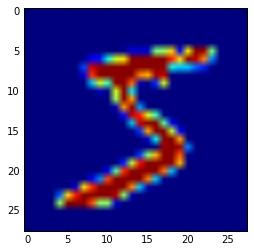

In [11]:
#  train = [   (   28*28列のflattenされた画像,  label )   , () , () , ... ] 
plt.imshow(train[0][0].reshape((28,28)))
print train[0][1]

In [12]:
MAX_DATA=np.shape(train)[0]
def get_batch(n):
    ni=np.random.randint(0,MAX_DATA,n)
    x = train[ni][0] 
    y = train[ni][1]
    return x,y

In [13]:
class MyChain(Chain):
    def __init__(self):
        super(MyChain, self).__init__(
            c1=L.Convolution2D(1, 16, ksize=3, pad=1,),
            c2=L.Convolution2D(16, 64, ksize=3, pad=1),
            c3=L.Convolution2D(64, 256, ksize=3, pad=1),
            l1 = L.Linear(4*4*256,512),
            l2 = L.Linear(512,10),
        )
        
    def __call__(self,x,t):
        return F.softmax_cross_entropy(self.predict(x),t)

    def  predict(self,x):
        h1 = F.max_pooling_2d( F.relu(self.c1(x)),2)
        h2 = F.max_pooling_2d(F.relu(self.c2(h1)),2)
        h3 = F.max_pooling_2d(F.relu(self.c3(h2)),2)
        h4  = self.l1(h3)
        h5  = self.l2(h4)
        return h5


In [14]:
model = MyChain()
optimizer = optimizers.Adam()

optimizer.setup(model)

In [15]:
losses =[]
batch_num=100
for i in range(2000):
    x,y = get_batch(batch_num)
    
    x_ = Variable(x.astype(np.float32).reshape((batch_num,1,28,28)))
    t_ = Variable(y.astype(np.int32).reshape((batch_num)))
    
    model.zerograds()
    loss=model(x_,t_)
    loss.backward()
    optimizer.update()

    #losses.append(loss.data)
    print loss.data

plt.plot(losses)
plt.yscale('log')

2.30731678009
5.27415132523
3.65823698044
2.26130485535
2.21999835968
2.16117691994
2.07218170166
2.15008592606
1.89354944229
1.90908813477
1.84609174728
1.86677730083
1.61079323292
1.47461640835
1.35558116436


KeyboardInterrupt: 